In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random as rm

# Distribucion homogena de particulas en r

In [3]:
n = 10000
p = np.ndarray([n,4])

for i in range(n):
    
    r3 = rm.uniform(0, 1./3.)
    ct = rm.uniform(-1, 1)
    fi = rm.uniform(0, 2*np.pi)
    
    st = np.sqrt(1 - ct**2)
        
    x = (r3*3)**(1/3.) * st * np.cos(fi)
    y = (r3*3)**(1/3.) * st * np.sin(fi)
    z = (r3*3)**(1/3.) * ct
    
    p[i,:] = [i,x,y,z]
    
#print p

In [4]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

# ax1.plot(p[:,1],p[:,2],'o')
# ax1.set_xlabel('x')
# ax1.set_ylabel('y')

# ax2.plot(p[:,1],p[:,3],'o')
# ax2.set_xlabel('x')
# ax2.set_ylabel('z')

# plt.show()

# Calculemos la densidad para corroborar que la distribución es la correcta

#### $\rho(r)=\frac{M}{V}=\frac{M}{\frac{4}{3}\pi r^{3}}$

In [5]:
# p tiene el nro de partícula y las coordenadas cartesianas (x,y,z) de sus posiciones
print p

# Calculamos la coordenada r de cada partícula
r = np.zeros(n)
r = np.sqrt(p[:,1]**2 + p[:,2]**2 + p[:,3]**2)

#print r

[[ 0.00000000e+00  4.97626288e-01 -2.66608700e-01 -6.58065705e-01]
 [ 1.00000000e+00  1.38209963e-01 -1.35345611e-01  7.82775446e-01]
 [ 2.00000000e+00  2.08840859e-01  4.43839077e-01 -5.88538810e-01]
 ...
 [ 9.99700000e+03 -4.58421632e-01 -4.82475767e-01  6.36955572e-01]
 [ 9.99800000e+03 -4.06688347e-01  1.02256068e-01  1.17279452e-01]
 [ 9.99900000e+03 -1.56069832e-01  9.05029927e-01 -1.05953185e-01]]


In [6]:
# Calculamos la cantidad de partículas que hay entre r y r+dr. Para ello veamos en que cascara 
# se encuentra cada partícula. Suponemos que cada partícula tiene una masa m=1

dr = 0.1                  # ancho de cada cascarón
l  = int(1/dr)            # cantidad de cáscaras

m_r = np.zeros(l)         # masa en cada cascarón
rm  = np.zeros(n)         # nro del cascarón al que pertenece la partícula

for i in np.arange(n):
    rm[i] = int(r[i]/dr)
    j = int(rm[i])
    m_r[j] = m_r[j] + 1   # acá sumamos las partículas que están en cada cáscara.

#print rm
#print m_r


In [7]:
# Calculamos la cantidad de partículas que hay en las diferentes esferas de radio r

m_acum = np.zeros(l)       # masa correspondiente a cada esfera de radio r
m_acum[0] = m_r[0]

for i in np.arange(1,l):
    m_acum[i] = m_r[i-1] + m_r[i]

#print m_acum


In [17]:
# Calculemos la densidad que hay dentro de las esferas de radio r

r_m = np.arange(dr,1+dr,dr)           # radios de cada una de las esferas
# r_m = np.log10(r_m)
#print r_m

rho = 0.75 * m_acum/(np.pi * r_m**3)  # densidad de masa dentro de cada una de las esferas
rho = np.log10(rho)
#print rho


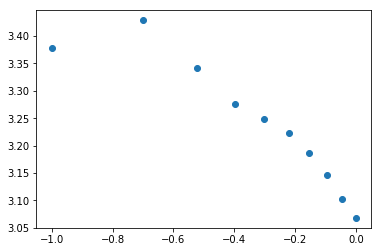

In [18]:
plt.plot(np.log10(r_m),rho,'o')